# Pós Graduação em IA - Processamento de Linguagem Natural e Lógica Fuzzy

### Equipe

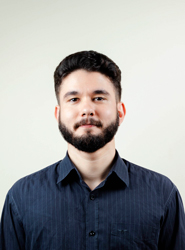

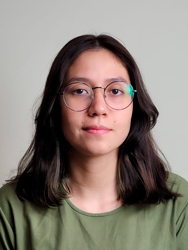

- Igor Noronha - 2016102026
- Yasmin Sousa - 2015201041

### Professor da disciplina

- Sérgio Monteiro, DSc

## **Analisador de melhores empresas para trabalhar por cargo**


### **1. Objetivo do Trabalho**
O objetivo deste trabalho é criar um sistema que analise as 5 melhores empresas para se trabalhar no cargo desejado. O sistema solicita ao usuário o cargo e realiza a análise das empresas com base em um arquivo CSV.


### **2. Fonte dos Dados**
O trabalho foi uma evolução de outro trabalho feito na matéria Sistemas Especialistas. No anterior foi usado dados de empresas mockados/fictícios. O atual usa um arquivo CSV extraído do site "Hugging Face" e contém mais de 800 mil dados reais no período de 2008 até 2021 do site "Glassdoor", uma plataforma de recrutamento e vagas que reúne informações sobre empresas. Fonte de dados: https://huggingface.co/datasets/lallantop/glassdoor


### **3. Colunas Utilizadas**
As colunas do arquivo CSV utilizadas no sistema são:
* "job_title" (Título do Cargo)
* "pros" (Prós)
* "cons" (Contras)
* "overall_rating" (Avaliação Geral)


### **4. O que é NLTK?**
NLTK (Natural Language Toolkit) é uma biblioteca em Python utilizada para trabalhar com processamento de linguagem natural. No nosso sistema, o NLTK foi usado para obter os sentimentos dos comentários prós e contras.


### **5. O que é Lógica Fuzzy?**
Lógica Fuzzy é uma técnica matemática da IA que modela problemas de forma aproximada, ou seja, entre os valores "verdadeiro" e "falso" há valores intermediários entre 0 e 1. No nosso sistema, a lógica fuzzy com a função de pertinência foi usada para medir a intensidade dos sentimentos e das proximidades das palavras na busca de cargos.


### **6. Análise de Sentimentos**
Para cada empresa, com base no cargo solicitado, o sistema retorna um gráfico de sentimentos com as seguintes categorias:
* Muito Negativo
* Negativo
* Neutro
* Positivo
* Muito Positivo


### **7. Nuvem de Palavras**
Além do gráfico de sentimentos, o sistema gera uma nuvem de palavras com as palavras normalizadas mais utilizadas nos comentários prós e contras.


### **8. Resultados Obtidos**
Vide código abaixo.


### **9. Conclusão**
O sistema conseguiu entregar uma ótima análise textual pois houveram testes com erros ortográficos propositais e ele retornou uma listagem precisa de cargos. Além disso, a análise das empresas com base nos cargos demonstrou uma lógica consistente com as tendências observadas no mercado. Por exemplo, desenvolvedores, numa visão global, almejam trabalhar em empresas renomadas como Google, IBM e Oracle. E foram justamente essas empresas que apareceram no gráfico quando inserido o cargo "Developer".

## Código

### Instalação das dependências

In [ ]:
!pip install fuzzywuzzy
!pip install scikit-fuzzy

### Importação das bibliotecas

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import skfuzzy as fuzz_lib
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Configurações de ambiente e variáveis

In [ ]:
# Configuração do ambiente
nltk.download('vader_lexicon')
analisador_sentimentos = SentimentIntensityAnalyzer()

# Carregar csv
dados_avaliacoes = pd.read_csv('glassdoor_reviews.csv')
lista_cargos = dados_avaliacoes['job_title'].dropna().unique().tolist()

# Definição de variáveis fuzzy para análise de sentimentos
pontuacao_sentimento = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'pontuacao_sentimento')
avaliacao_fuzzy = ctrl.Consequent(np.arange(0, 5, 1), 'avaliacao_fuzzy')

pontuacao_sentimento['muito_negativo'] = fuzz_lib.trimf(pontuacao_sentimento.universe, [-1, -1, -0.5])
pontuacao_sentimento['negativo'] = fuzz_lib.trimf(pontuacao_sentimento.universe, [-1, -0.5, 0])
pontuacao_sentimento['neutro'] = fuzz_lib.trimf(pontuacao_sentimento.universe, [-0.5, 0, 0.5])
pontuacao_sentimento['positivo'] = fuzz_lib.trimf(pontuacao_sentimento.universe, [0, 0.5, 1])
pontuacao_sentimento['muito_positivo'] = fuzz_lib.trimf(pontuacao_sentimento.universe, [0.5, 1, 1])

avaliacao_fuzzy['muito_negativo'] = fuzz_lib.trimf(avaliacao_fuzzy.universe, [0, 0, 1])
avaliacao_fuzzy['negativo'] = fuzz_lib.trimf(avaliacao_fuzzy.universe, [0, 1, 2])
avaliacao_fuzzy['neutro'] = fuzz_lib.trimf(avaliacao_fuzzy.universe, [1, 2, 3])
avaliacao_fuzzy['positivo'] = fuzz_lib.trimf(avaliacao_fuzzy.universe, [2, 3, 4])
avaliacao_fuzzy['muito_positivo'] = fuzz_lib.trimf(avaliacao_fuzzy.universe, [3, 4, 5])

# Regras fuzzy para análise de sentimentos
regra1 = ctrl.Rule(pontuacao_sentimento['muito_negativo'], avaliacao_fuzzy['muito_negativo'])
regra2 = ctrl.Rule(pontuacao_sentimento['negativo'], avaliacao_fuzzy['negativo'])
regra3 = ctrl.Rule(pontuacao_sentimento['neutro'], avaliacao_fuzzy['neutro'])
regra4 = ctrl.Rule(pontuacao_sentimento['positivo'], avaliacao_fuzzy['positivo'])
regra5 = ctrl.Rule(pontuacao_sentimento['muito_positivo'], avaliacao_fuzzy['muito_positivo'])

# Sistema de controle fuzzy
controle_sentimentos = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
simulacao_sentimentos = ctrl.ControlSystemSimulation(controle_sentimentos)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Funções

In [ ]:
# Consultar cargos usando fuzzy matching
def buscar_cargos_similares(cargo_digitado):
    resultados_fuzzy = process.extract(cargo_digitado, lista_cargos, limit=10, scorer=fuzz.token_set_ratio)
    cargos_encontrados = [cargo[0] for cargo in resultados_fuzzy]
    print(f"Cargos semelhantes encontrados para '{cargo_digitado}': {cargos_encontrados}")
    return cargos_encontrados

# Aplicação da lógica fuzzy na análise de sentimentos
def aplicar_logica_fuzzy(valor_sentimento):
    simulacao_sentimentos.input['pontuacao_sentimento'] = valor_sentimento
    simulacao_sentimentos.compute()

    resultado_fuzzy = simulacao_sentimentos.output['avaliacao_fuzzy']

    if resultado_fuzzy < 1:
        return 'muito_negativo'
    elif 1 <= resultado_fuzzy < 2:
        return 'negativo'
    elif 2 <= resultado_fuzzy < 3:
        return 'neutro'
    elif 3 <= resultado_fuzzy < 4:
        return 'positivo'
    else:
        return 'muito_positivo'

# Exibição do gráfico de sentimentos
def mostrar_grafico_sentimentos(porcentagens, nome_empresa, cargo_digitado):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(porcentagens.keys(), porcentagens.values(), color=['green', 'red', 'blue'])
    plt.xlabel('Sentimento')
    plt.ylabel('Porcentagem (%)')
    plt.title(f'Análise de Sentimentos - {nome_empresa} - {cargo_digitado}')
    for barra in ax.patches:
        altura = barra.get_height()
        ax.annotate(f'{altura:.1f}%', xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    plt.show()

# Exibição da nuvem de palavras
def mostrar_nuvem_palavras(texto_completo, nome_empresa, cargo_digitado):
    nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
    plt.figure(figsize=(7, 5))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {nome_empresa} - {cargo_digitado}')
    plt.show()

# Análise de sentimento e recomendação de empresas
def analisar_empresas(cargos_encontrados):
    dados_filtrados = dados_avaliacoes[
        dados_avaliacoes['job_title'].apply(lambda x: any(cargo.lower() in x.lower() for cargo in cargos_encontrados))].copy()

    if dados_filtrados.empty:
        print("Nenhuma empresa encontrada com os filtros aplicados.")
        return dados_filtrados

    dados_filtrados['sentimento_pros'] = dados_filtrados['pros'].apply(lambda x: analisador_sentimentos.polarity_scores(str(x))['compound'])
    dados_filtrados['sentimento_cons'] = dados_filtrados['cons'].apply(lambda x: analisador_sentimentos.polarity_scores(str(x))['compound'])

    dados_filtrados['sentimento_geral'] = dados_filtrados[['sentimento_pros', 'sentimento_cons']].mean(axis=1)
    dados_filtrados['avaliacao_fuzzy'] = dados_filtrados['sentimento_geral'].apply(aplicar_logica_fuzzy)

    return dados_filtrados

def sistema_recomendacao():
    cargo_digitado = input("Digite o cargo desejado: ")
    cargos_similares = buscar_cargos_similares(cargo_digitado)
    empresas_recomendadas = analisar_empresas(cargos_similares)

    if not empresas_recomendadas.empty:
        empresas_recomendadas = empresas_recomendadas[empresas_recomendadas['overall_rating'] > 3]

        if empresas_recomendadas.empty:
            print("Nenhuma empresa com avaliação acima de 3 foi encontrada.")
            return

        print("Empresas recomendadas:")

        empresas_por_numero_reviews = empresas_recomendadas.groupby('firm').size()
        limite_reviews = empresas_por_numero_reviews.quantile(0.75)

        empresas_filtradas = empresas_por_numero_reviews[empresas_por_numero_reviews >= limite_reviews].index
        empresas_recomendadas_filtradas = empresas_recomendadas[empresas_recomendadas['firm'].isin(empresas_filtradas)]
        empresas_ordenadas = empresas_recomendadas_filtradas.groupby('firm').size().sort_values(ascending=False)
        principais_empresas = empresas_ordenadas.head(5).index

        for empresa in principais_empresas:
            dados_empresa = empresas_recomendadas[empresas_recomendadas['firm'] == empresa].iloc[0]
            print(f"- Empresa: {dados_empresa['firm']}\n  Avaliação Geral: {dados_empresa['overall_rating']}/5\n")

        # Exibir gráficos e nuvens de palavras para as principais empresas
        for empresa in principais_empresas:
            dados_empresa = empresas_recomendadas[empresas_recomendadas['firm'] == empresa]
            print(f"\nExibindo gráficos e nuvem de palavras para {empresa}:")

            distribuicao_sentimentos = {'positivo': 0, 'negativo': 0, 'neutro': 0, 'muito_positivo': 0, 'muito_negativo': 0}
            for _, linha in dados_empresa.iterrows():
                sentimento = linha['sentimento_geral']
                if sentimento >= 0.75:
                    distribuicao_sentimentos['muito_positivo'] += 1
                elif sentimento >= 0.25:
                    distribuicao_sentimentos['positivo'] += 1
                elif sentimento <= -0.75:
                    distribuicao_sentimentos['muito_negativo'] += 1
                elif sentimento <= -0.25:
                    distribuicao_sentimentos['negativo'] += 1
                else:
                    distribuicao_sentimentos['neutro'] += 1

            total_opinioes = sum(distribuicao_sentimentos.values())
            porcentagens = {k: (v / total_opinioes) * 100 if total_opinioes > 0 else 0 for k, v in distribuicao_sentimentos.items()}

            mostrar_grafico_sentimentos(porcentagens, empresa, cargo_digitado)

            texto_completo_opinioes = ' '.join(dados_empresa['pros'].astype(str) + ' ' + dados_empresa['cons'].astype(str))
            mostrar_nuvem_palavras(texto_completo_opinioes, empresa, cargo_digitado)
    else:
        print("Nenhuma empresa encontrada com os filtros aplicados.")

### Chamada da função principal

Digite o cargo desejado: Developer
Cargos semelhantes encontrados para 'Developer': [' Software Developer', ' Front End Developer', ' Applications Developer', ' Web Developer', ' Senior Developer', ' Senior Mobile Developer', ' Associate Software Developer', ' IOS Developer', ' Associate Web Developer', ' Developer']
Empresas recomendadas:
- Empresa: IBM
  Avaliação Geral: 4/5

- Empresa: SAP
  Avaliação Geral: 4/5

- Empresa: Oracle
  Avaliação Geral: 4/5

- Empresa: Google
  Avaliação Geral: 4/5

- Empresa: J-P-Morgan
  Avaliação Geral: 4/5


Exibindo gráficos e nuvem de palavras para IBM:


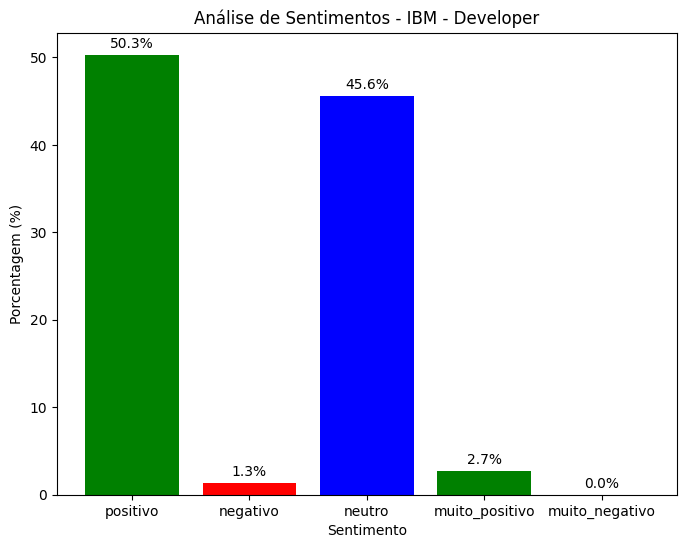

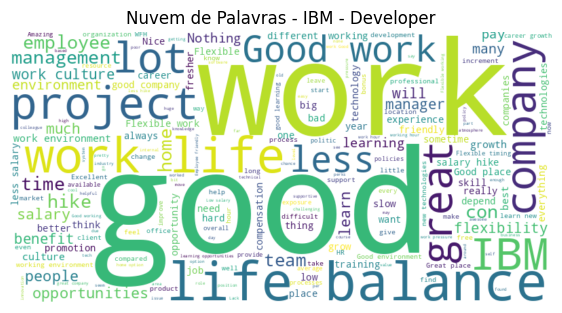


Exibindo gráficos e nuvem de palavras para SAP:


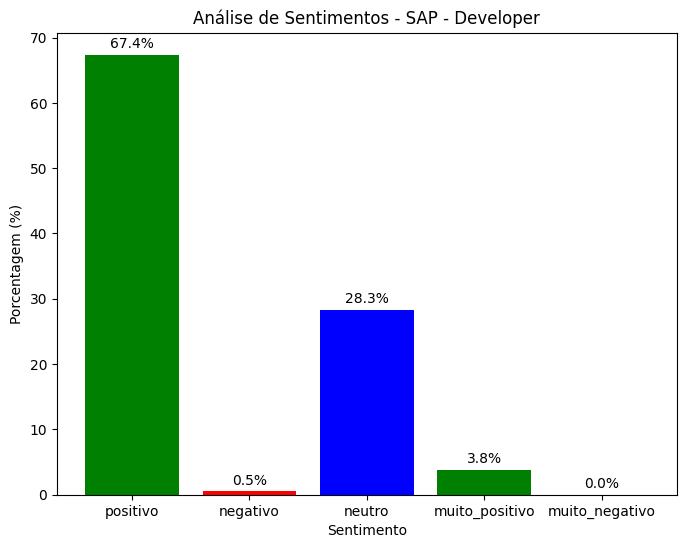

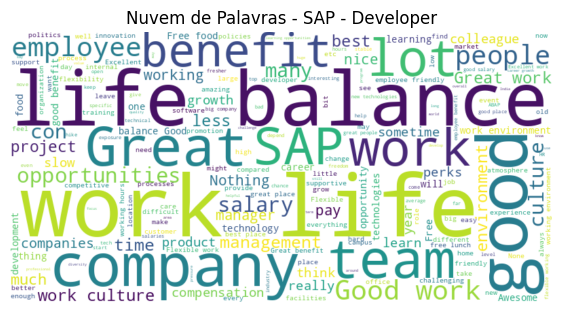


Exibindo gráficos e nuvem de palavras para Oracle:


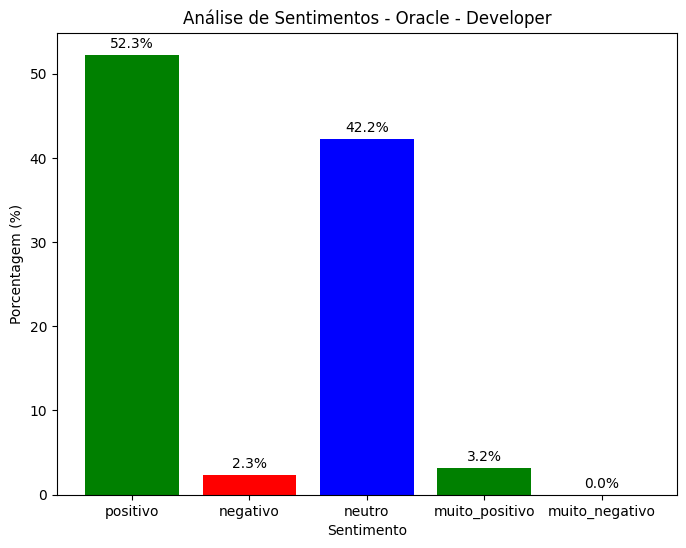

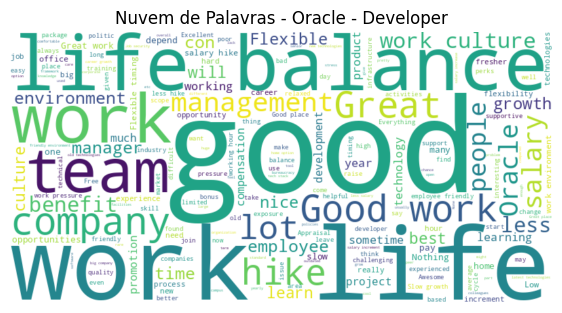


Exibindo gráficos e nuvem de palavras para Google:


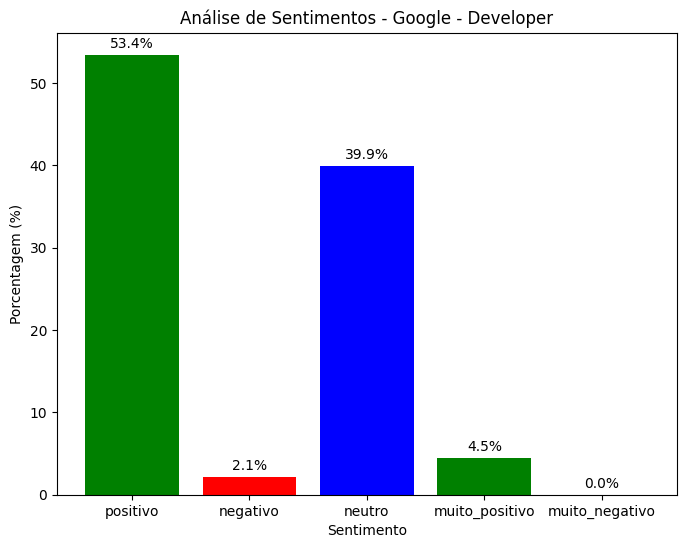

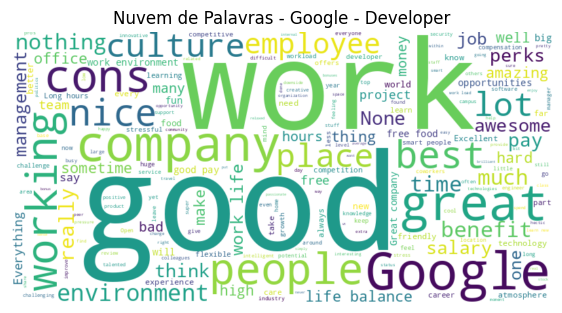


Exibindo gráficos e nuvem de palavras para J-P-Morgan:


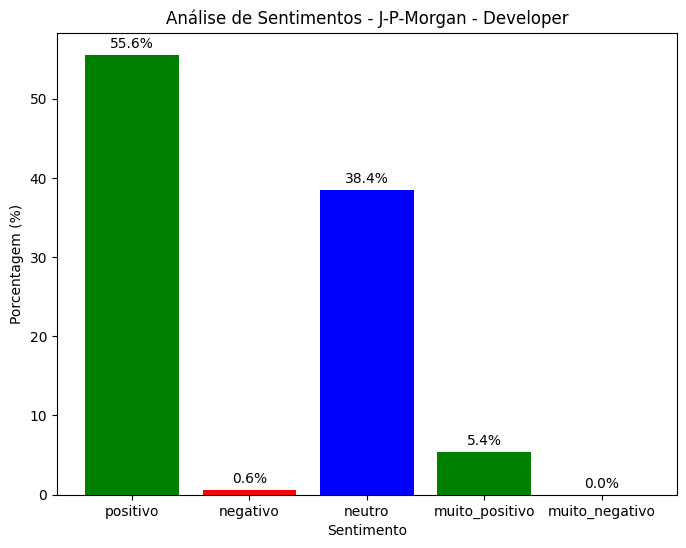

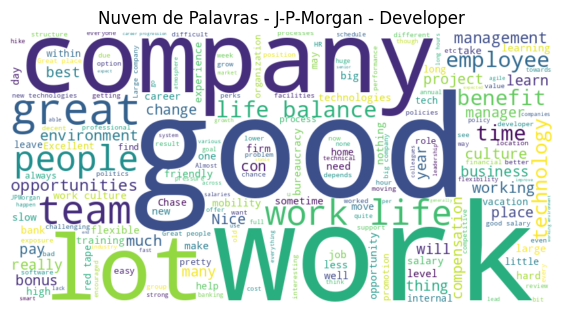

In [ ]:
sistema_recomendacao()